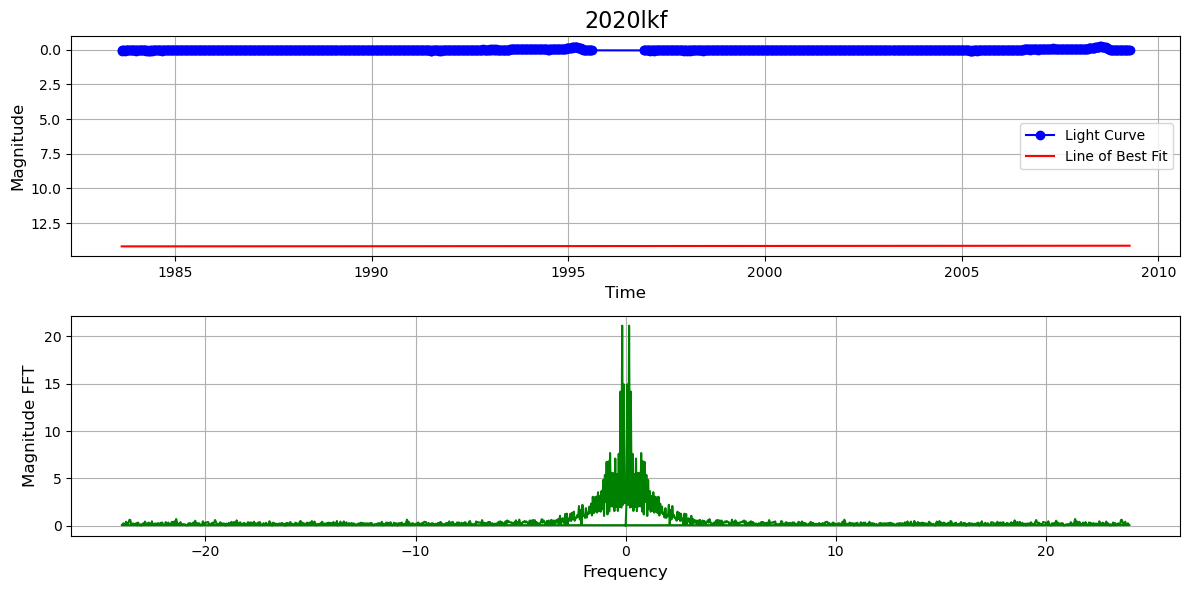

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def compute_fourier_transform(df):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Time'], df['Magnitude'])
    line = slope * df['Time'] + intercept
    
    # Remove the mean magnitude to eliminate the DC component
    magnitude_mean = np.mean(df['Magnitude'])
    df['Magnitude'] -= magnitude_mean
    
    # Compute the Fourier Transform of the magnitude
    mag_fft = np.fft.fft(df['Magnitude'])
    freqs = np.fft.fftfreq(len(df['Time']), df['Time'][1] - df['Time'][0])
    
    return freqs, mag_fft, slope, intercept

def plot_light_curve_with_fft(txt_file, delimiter=r"\s+", title="Light Curve"):
    # Read the .txt file into a DataFrame
    try:
        df = pd.read_csv(txt_file, delimiter=delimiter, skiprows=2, header=None, usecols=[1,4], names=['Time', 'Magnitude'])
    except pd.errors.EmptyDataError:
        print(f"The file '{txt_file}' is empty.")
        return
    except pd.errors.ParserError:
        print(f"Error parsing '{txt_file}'. Please check the file format.")
        return
    
    freqs, mag_fft, slope, intercept = compute_fourier_transform(df)
    
    # Plot the light curve and its Fourier Transform
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(df['Time'], df['Magnitude'], marker='o', linestyle='-', color='blue', label='Light Curve')
    plt.plot(df['Time'], slope * df['Time'] + intercept, color='red', label='Line of Best Fit')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(freqs, np.abs(mag_fft), color='green')
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Magnitude FFT', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
txt_file = r"C:\Users\nic51\TESS RESEARCH\Extracted_tarballs\sector25\cam4_ccd1\lc_discovery\lc_2020lkf_cleaned.txt"
delimiter = r"\s+"  # Change this to the appropriate delimiter (e.g., ',', ' ', etc.)
title = "2020lkf"  # Change this to the appropriate title
plot_light_curve_with_fft(txt_file, delimiter, title)


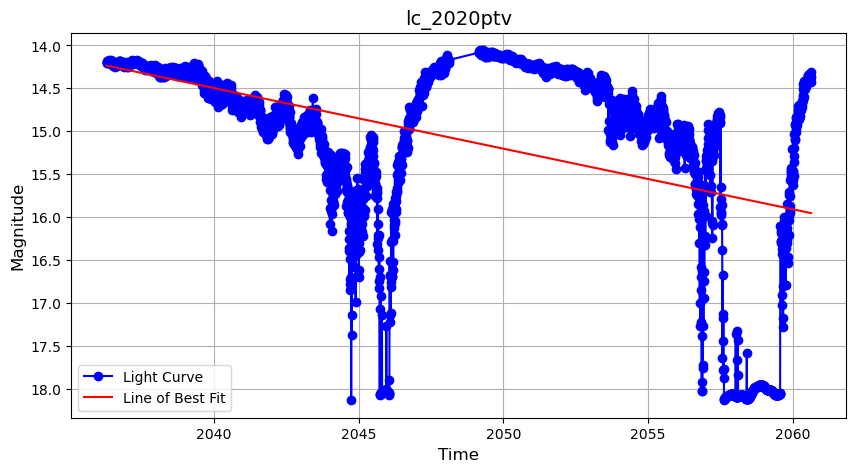

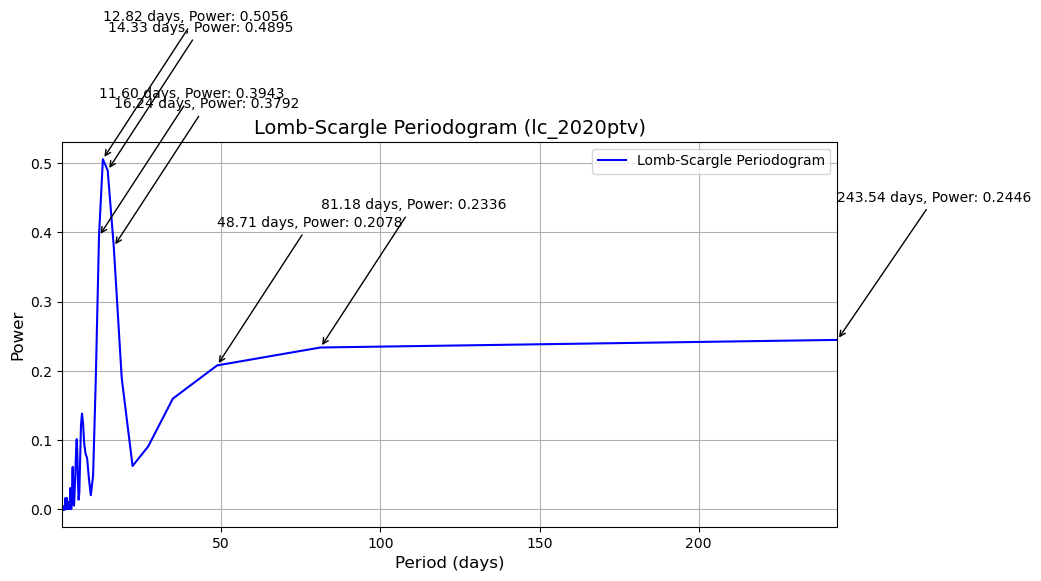

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from astropy.timeseries import LombScargle

def plot_light_curve(txt_file, delimiter=r"\s+"):
    try:
        df = pd.read_csv(txt_file, delimiter=delimiter, skiprows=2, header=None, usecols=[1,4], names=['Time', 'Magnitude'])
    except pd.errors.EmptyDataError:
        print(f"The file '{txt_file}' is empty.")
        return
    except pd.errors.ParserError:
        print(f"Error parsing '{txt_file}'. Please check the file format.")
        return

    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Time'], df['Magnitude'])
    line = slope * df['Time'] + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(df['Time'], df['Magnitude'], marker='o', linestyle='-', color='blue', label='Light Curve')
    plt.plot(df['Time'], line, color='red', label='Line of Best Fit')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.title('lc_2020ptv', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()

    frequency, power = LombScargle(df['Time'], df['Magnitude']).autopower()

    periods = 1 / frequency
    power_peaks = power

    tolerance = .01
    non_zero_indices = np.abs(periods) > tolerance
    periods = periods[non_zero_indices]
    power_peaks = power_peaks[non_zero_indices]

    plt.figure(figsize=(10, 5))
    plt.plot(periods, power_peaks, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (days)', fontsize=12)
    plt.ylabel('Power', fontsize=12)
    plt.title('Lomb-Scargle Periodogram (lc_2020ptv)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.xlim(0.1, np.max(periods))

    # ... (rest of the code for calculating periods, power peaks, and identifying significant peaks) ...

    significance_threshold = 0.4
    significant_indices = power_peaks > significance_threshold * np.max(power_peaks)

    previously_annotated_periods = []
    y_offset = 0.2
    collision_buffer = 0.75

# Annotations for periods and power (insert here)
    for period, peak_power in zip(periods[significant_indices], power_peaks[significant_indices]):
        colliding = False
        for annotated_period in previously_annotated_periods:
            if abs(period - annotated_period) < collision_buffer:
                colliding = True
                break
        if colliding:
            # Adjust y_offset for collision avoidance
            num_collisions = sum(abs(period - annotated_period) < collision_buffer for annotated_period in previously_annotated_periods)
            y_offset = 0.2 + num_collisions * 0.1
        plt.annotate(f"{period:.2f} days, Power: {peak_power:.4f}",  # Include power in annotation
                    xy=(period, peak_power),
                    xytext=(period, peak_power + y_offset),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
        previously_annotated_periods.append(period)

# ... (rest of the plotting code) ...


    plt.show()

def main():
    txt_file = r"C:\Users\nic51\TESS RESEARCH\Extracted_tarballs\sector27\cam2_ccd2\lc_discovery\lc_2020ptv_cleaned.txt"
    delimiter = r"\s+"
    plot_light_curve(txt_file, delimiter)

if __name__ == "__main__":
    main()


UnboundLocalError: cannot access local variable 'x_offset' where it is not associated with a value

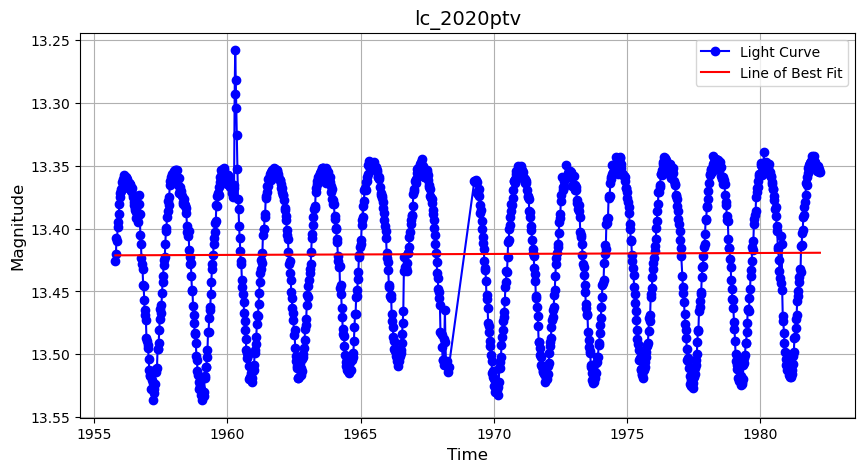

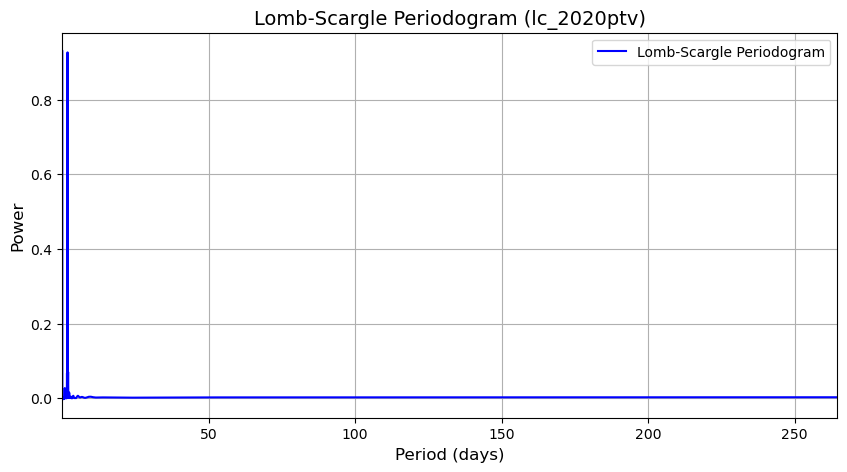

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from astropy.timeseries import LombScargle

def plot_light_curve(txt_file, delimiter=r"\s+"):
    try:
        df = pd.read_csv(txt_file, delimiter=delimiter, skiprows=2, header=None, usecols=[1,4], names=['Time', 'Magnitude'])
    except pd.errors.EmptyDataError:
        print(f"The file '{txt_file}' is empty.")
        return
    except pd.errors.ParserError:
        print(f"Error parsing '{txt_file}'. Please check the file format.")
        return

    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Time'], df['Magnitude'])
    line = slope * df['Time'] + intercept

    plt.figure(figsize=(10, 5))
    plt.plot(df['Time'], df['Magnitude'], marker='o', linestyle='-', color='blue', label='Light Curve')
    plt.plot(df['Time'], line, color='red', label='Line of Best Fit')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.title('lc_2020ptv', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()

    frequency, power = LombScargle(df['Time'], df['Magnitude']).autopower()

    periods = 1 / frequency
    power_peaks = power

    tolerance = .01
    non_zero_indices = np.abs(periods) > tolerance
    periods = periods[non_zero_indices]
    power_peaks = power_peaks[non_zero_indices]

    plt.figure(figsize=(10, 5))
    plt.plot(periods, power_peaks, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (days)', fontsize=12)
    plt.ylabel('Power', fontsize=12)
    plt.title('Lomb-Scargle Periodogram (lc_2020ptv)', fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.xlim(0.1, np.max(periods))

    # ... (rest of the code for calculating periods, power peaks, and identifying significant peaks) ...

    significance_threshold = .99
    significant_indices = power_peaks > significance_threshold * np.max(power_peaks)

    previously_annotated_periods = []
    y_offset = 0.2
    collision_buffer = 0.9


    # Annotations for periods and power
    for period, peak_power in zip(periods[significant_indices], power_peaks[significant_indices]):
        colliding = False
        for annotated_period, annotated_power in previously_annotated_periods:  # Store both period and power
            if abs(period - annotated_period) < collision_buffer_x and abs(peak_power - annotated_power) < collision_buffer_y:
                colliding = True
                break
        if colliding:
            # Adjust y_offset and x_offset for collision avoidance
            num_collisions = sum(abs(period - annotated_period) < collision_buffer_x
                                and abs(peak_power - annotated_power) < collision_buffer_y
                                for annotated_period, annotated_power in previously_annotated_periods)
            y_offset = 0.2 + num_collisions * 0.1
            x_offset = 0.1  # Initial horizontal offset
        plt.annotate(f"{period:.2f} days, Power: {peak_power:.4f}",
                    xy=(period, peak_power),
                    xytext=(period + x_offset, peak_power + y_offset),  # Use both offsets
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
        previously_annotated_periods.append((period, peak_power))  # Store both period and power




    plt.show()

def main():
    txt_file = r"C:\Users\nic51\TESS RESEARCH\Extracted_tarballs\sector24\cam3_ccd1\lc_discovery\lc_2020jhe_cleaned.txt"
    delimiter = r"\s+"
    plot_light_curve(txt_file, delimiter)

if __name__ == "__main__":
    main()
